#Importing all necessary Librairies

In [ ]:
import pandas as pd
import numpy as np

#Loading Dataset

In [ ]:
df = pd.read_excel("BankChurners.xlsx", sheet_name="BankChurners")


#Displaying first few rows to understand the data

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book (Length of relationship with bansk[months]),...,Months_Inactive_12_mon (Card not used),Contacts_Count_12_mon (Number of contacts in 12 months),Credit_Limit,Total_Revolving_Bal (Balance unpaid at month end),Avg_Open_To_Buy (Difference between the credit limit and the balance),Total_Amt_Chng_Q4_Q1(Ratio Q4/Q1),Total_Trans_Amt ( Total Transactions Value 12 months),Total_Trans_Ct (Transaction Count 12 months),Total_Ct_Chng_Q4_Q1 (Change in the transaction amount Q4/Q1),Avg_Utilization_Ratio (Credit usage/Total Credit available)
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#Checking if dataset has null values

In [ ]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book (Length of relationship with bansk[months]),0


#Copied the dataframe for cleaning

In [ ]:
df_clean = df.copy()

#Removing Duplicates and Identifier column

I removed the CLIENTNUM column because it's a unique identifier assigned to each customer. It doesn't carry any meaningful information that helps predict churn. Including such ID columns can mislead machine learning models, causing them to memorize patterns based on arbitrary numbers rather than learning real relationships in the data. Also, identifier columns can introduce data leakage if not handled carefully. Therefore, we dropped it to keep the dataset focused only on relevant, predictive features.

#Removing Duplicates
I used .drop_duplicates(subset=["CLIENTNUM"]) to ensure there were no repeated entries for the same customer. Duplicate records can skew analysis and model training by giving more weight to repeated entries, which biases the model. This step ensures that each customer contributes equally to the learning process.

In [ ]:
df_clean = df.drop_duplicates(subset=["CLIENTNUM"]).drop(columns=["CLIENTNUM"])

#Creating the Target Column (Churn)
Created a new binary column named Churn based on the existing Attrition_Flag column. This converts the text labels:

"Existing Customer" → 0 (not churned)

"Attrited Customer" → 1 (churned)

This is essential because machine learning models require numerical values to perform classification tasks. Once this conversion is done, the original Attrition_Flag column is no longer needed and is dropped.

In [ ]:
df_clean["Churn"] = df_clean["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)
df_clean.drop(columns=["Attrition_Flag"], inplace=True)

#Handling Missing or Unknown Values

Several categorical columns, like Education_Level, Marital_Status, and Income_Category, contained the value "Unknown". This is a placeholder for missing or unavailable data. We replaced these with NaN to treat them as missing values properly. This allows us to later apply imputation techniques to fill them in appropriately. Treating unknowns as real values can distort model behavior, so identifying them as missing is a crucial cleaning step.

In [ ]:
categorical_cols = ["Education_Level", "Marital_Status", "Income_Category"]
df_clean[categorical_cols] = df_clean[categorical_cols].replace("Unknown", pd.NA)

# Data & Target Setup

Ensured a clean dataset and a clear, consistent churn label by creating a single target column Churn where 1 indicates the customer attrited and 0 indicates the customer stayed.

Identify which columns are numeric and which are categorical (before any new features are created), and retain only analysis-safe fields since IDs and obvious identifiers were removed during cleaning.

This clarity matters because a consistent target prevents confusion, the numeric-versus-categorical split dictates appropriate plots and statistical tests, and the result provides a repeatable baseline for the team.

After this step, expect TARGET = 'Churn', num_cols_base (numeric columns), and cat_cols_base (categorical columns).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.metrics import roc_auc_score

# --- Ensuring target column exists and is 0/1 as 'Churn' ---
if 'Churn' not in df.columns:
    if 'Attrition_Flag' in df.columns:
        df['Churn'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
    else:
        raise ValueError("Couldn't find target column. Expect 'Churn' or 'Attrition_Flag'.")

# convenience handles
TARGET = 'Churn'

# basic type splits (will be refined later)
num_cols_base = df.select_dtypes(include=[np.number]).columns.drop(TARGET, errors='ignore')
cat_cols_base = [c for c in df.columns if df[c].dtype == 'object' and c != TARGET]

print(f"Numeric columns (base): {len(num_cols_base)}")
print(f"Categorical columns (base): {len(cat_cols_base)}")


Numeric columns (base): 15
Categorical columns (base): 6


# Explore Feature Relationships to Churn

(Exploring feature differences):

Examined how features differ between churners and non-churners by (a) for **categorical** variables, computing churn rate per category, testing significance with a **Chi-square** test, and visualizing **bar charts** of churn rate by category; and (b) for **numeric** variables, comparing group distributions with **boxplots**, testing differences using the **Mann–Whitney U** test, and estimating single-feature **ROC-AUC** to gauge discriminative power (0.5 ≈ random, closer to 1.0 ≈ better).

Interpret results as follows: **low p-values** (e.g., < 0.05) suggest differences unlikely due to chance; **higher AUCs** indicate stronger standalone ranking ability; and the charts help reveal large, consistent gaps. No features are dropped or transformed at this stage—this step focuses on understanding relationships, not making selection decisions.


,feature,n_unique,chi2_pvalue,max_churn_rate,min_churn_rate
0,Attrition_Flag,2,0.000000,1.000000,0.000000
1,Gender,2,0.000196,0.173572,0.146152
4,Income_Category,6,0.025002,0.173315,0.134807
2,Education_Level,7,0.051489,0.210643,0.152012
3,Marital_Status,4,0.108913,0.172230,0.151269
5,Card_Category,4,0.525238,0.250000,0.147748


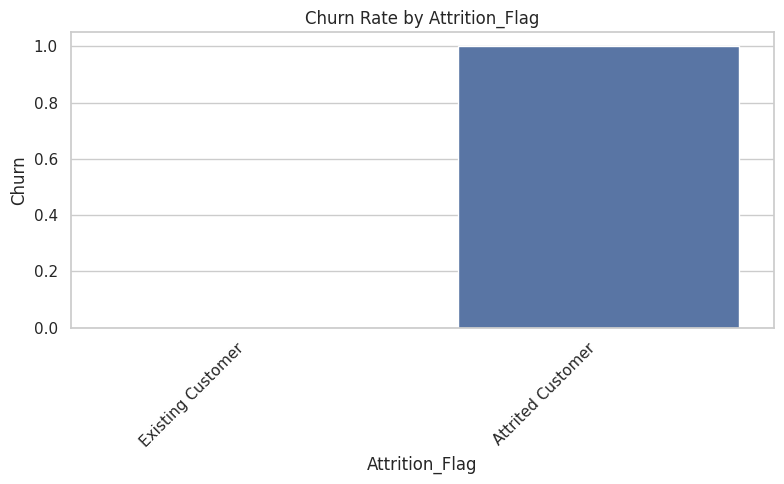

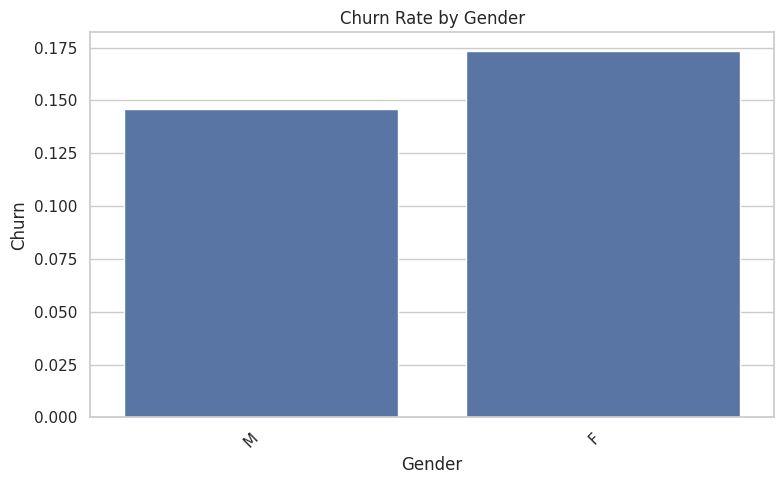

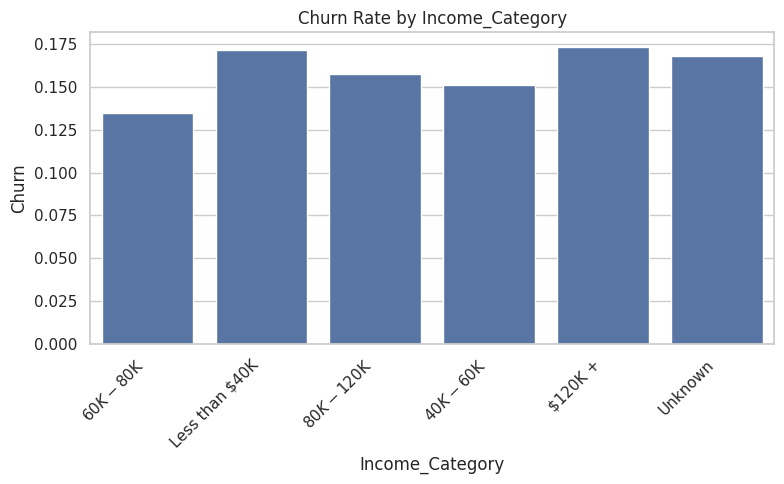

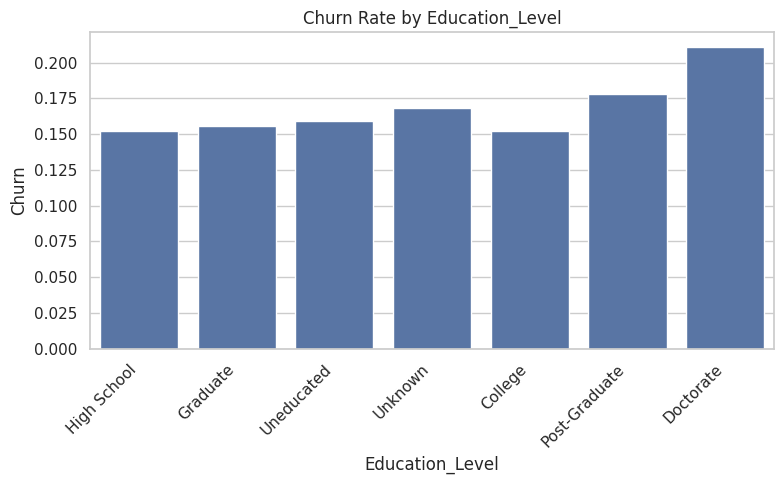

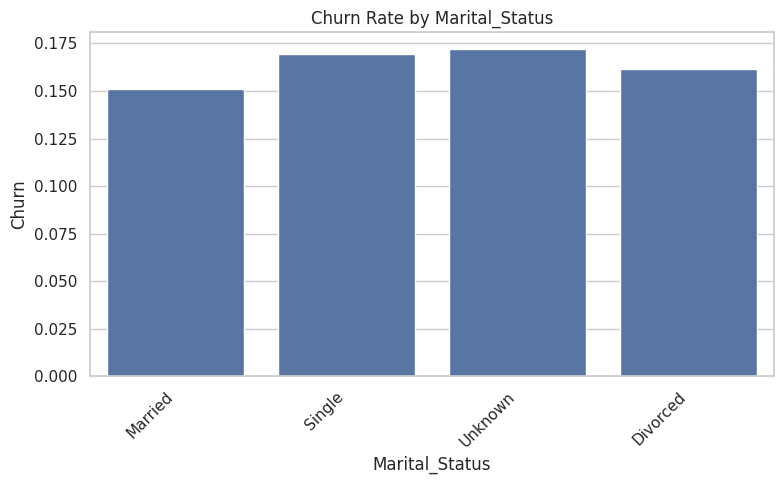

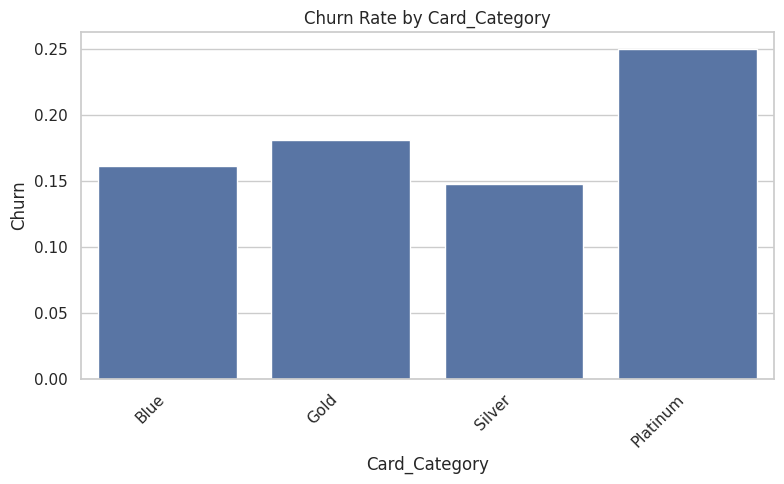

,feature,mw_pvalue,auc_univariate,mean_churn0,mean_churn1
12,Total_Trans_Ct (Transaction Count 12 months),0.000000e+00,0.795642,6.867259e+01,4.493362e+01
13,Total_Ct_Chng_Q4_Q1 (Change in the transaction...,1.908241e-216,0.745311,7.424341e-01,5.543860e-01
8,Total_Revolving_Bal (Balance unpaid at month end),1.915679e-129,0.687712,1.256604e+03,6.728230e+02
14,Avg_Utilization_Ratio (Credit usage/Total Cred...,2.869097e-129,0.687595,2.964118e-01,1.624751e-01
11,Total_Trans_Amt ( Total Transactions Value 12 ...,2.719009e-112,0.675919,4.654656e+03,3.095026e+03
6,Contacts_Count_12_mon (Number of contacts in 1...,1.110888e-80,0.642890,2.356353e+00,2.972342e+00
5,Months_Inactive_12_mon (Card not used),5.423116e-67,0.628180,2.273765e+00,2.693301e+00
4,Total_Relationship_Count (How many products wi...,2.905717e-51,0.615652,3.914588e+00,3.279656e+00
10,Total_Amt_Chng_Q4_Q1(Ratio Q4/Q1),1.064474e-24,0.580154,7.725095e-01,6.942766e-01
0,CLIENTNUM,2.312619e-09,0.546671,7.399272e+08,7.352614e+08


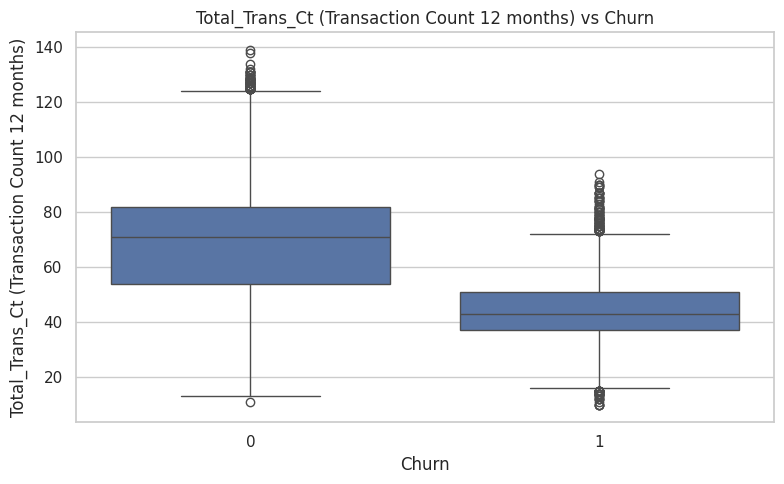

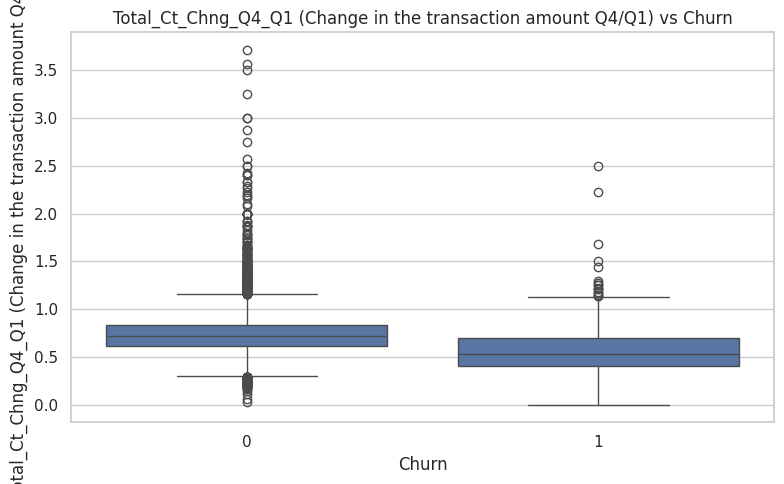

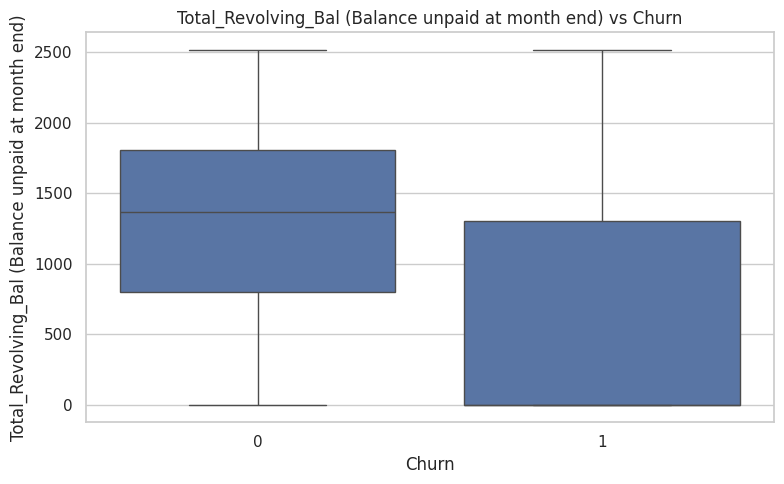

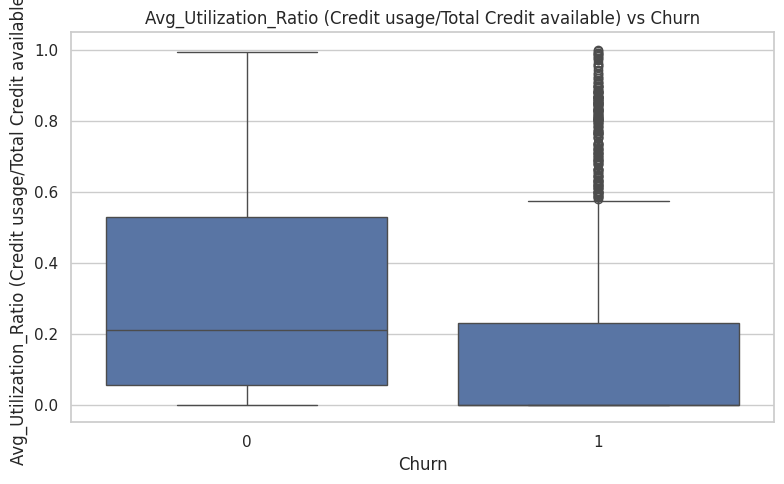

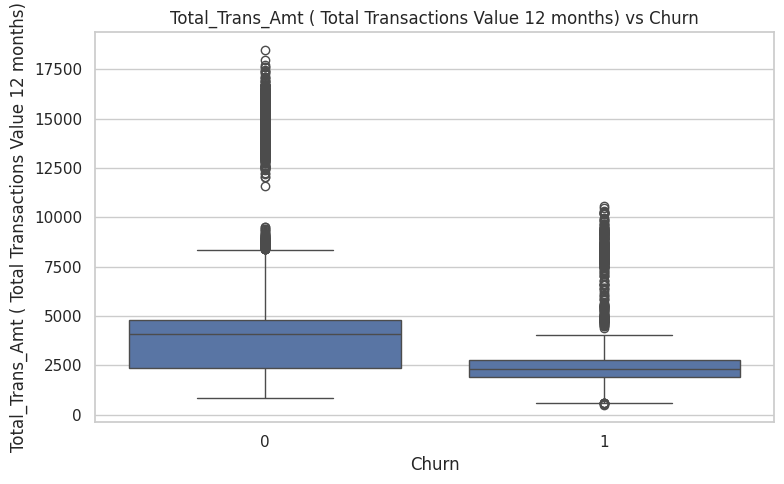

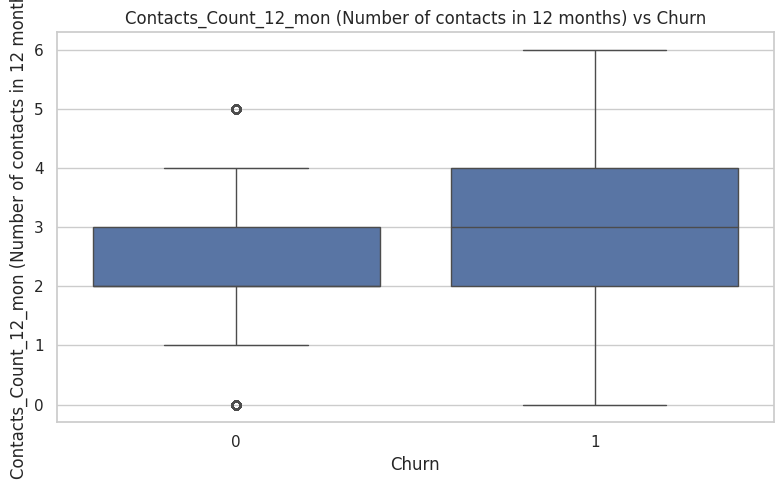

In [ ]:
# ==== Relationships to Churn ====
y = df[TARGET]

# ----- CATEGORICAL: churn rate per category + chi-square p-values -----
cat_rows = []
for col in cat_cols_base:
    # churn rate table
    rates = df.groupby(col)[TARGET].mean().sort_values(ascending=False)
    # chi-square (only if >1 category)
    ct = pd.crosstab(df[col], y)
    if ct.shape[0] > 1 and ct.shape[1] > 1:
        chi2, p, dof, _ = chi2_contingency(ct)
    else:
        p = np.nan
    cat_rows.append({
        'feature': col,
        'n_unique': df[col].nunique(),
        'chi2_pvalue': p,
        'max_churn_rate': rates.iloc[0] if len(rates) else np.nan,
        'min_churn_rate': rates.iloc[-1] if len(rates) else np.nan
    })

cat_summary = pd.DataFrame(cat_rows).sort_values(['chi2_pvalue','max_churn_rate'], na_position='last')
display(cat_summary.head(20))

# visualize top 6 categorical features by churn rate spread
top_cat_feats = cat_summary.head(6)['feature'].tolist()
for c in top_cat_feats:
    plt.figure()
    sns.barplot(x=c, y=TARGET, data=df, estimator=np.mean, errorbar=None)
    plt.title(f'Churn Rate by {c}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# ----- NUMERIC: group stats + Mann-Whitney U + univariate AUC -----
num_rows = []
for col in num_cols_base:
    x0 = df.loc[df[TARGET]==0, col].dropna()
    x1 = df.loc[df[TARGET]==1, col].dropna()
    # Mann-Whitney (non-parametric)
    p = np.nan
    if len(x0) > 0 and len(x1) > 0:
        try:
            _, p = mannwhitneyu(x0, x1, alternative='two-sided')
        except Exception:
            p = np.nan
    # Univariate AUC (if variable not constant)
    auc = np.nan
    if df[col].nunique() > 1:
        try:
            auc_raw = roc_auc_score(y, df[col])
            auc = max(auc_raw, 1 - auc_raw)  # normalize direction
        except Exception:
            auc = np.nan

    num_rows.append({
        'feature': col,
        'mw_pvalue': p,
        'auc_univariate': auc,
        'mean_churn0': x0.mean() if len(x0) else np.nan,
        'mean_churn1': x1.mean() if len(x1) else np.nan
    })

num_summary = pd.DataFrame(num_rows).sort_values(['auc_univariate','mw_pvalue'], ascending=[False, True], na_position='last')
display(num_summary.head(20))

# visualize distributions for top 6 numeric features
best_nums = num_summary.head(6)['feature'].tolist()
for c in best_nums:
    plt.figure()
    sns.boxplot(x=TARGET, y=c, data=df)
    plt.title(f'{c} vs Churn')
    plt.tight_layout()
    plt.show()


# Shortlist Predictive Features (Mutual Information)

**(Shortlist Predictive Features):** Build a prioritized list of churn predictors by computing **Mutual Information (MI)** between each feature and `Churn`, temporarily **one-hot encoding** categorical variables solely for ranking purposes; complement MI with single-feature **ROC-AUC** from Step 1 (for numeric columns) to triangulate importance.

MI is preferred here because it captures **non-linear** and **non-monotonic** relationships and directly answers how much a feature reduces uncertainty about churn. Interpret higher MI values as more informative signals, but balance rankings with business meaning, data quality, and stability.

The deliverable is a table or chart of the **top features by MI** (e.g., top 15–20), which then guides correlation pruning and subsequent feature engineering.





,mutual_info,auc_univariate
Attrition_Flag_Existing Customer,0.442638,NaN
Attrition_Flag_Attrited Customer,0.440960,NaN
Total_Trans_Amt ( Total Transactions Value 12 months),0.156603,0.675919
Total_Trans_Ct (Transaction Count 12 months),0.110411,0.795642
Total_Ct_Chng_Q4_Q1 (Change in the transaction amount Q4/Q1),0.096084,0.745311
Total_Revolving_Bal (Balance unpaid at month end),0.081797,0.687712
Avg_Utilization_Ratio (Credit usage/Total Credit available),0.048791,0.687595
Total_Amt_Chng_Q4_Q1(Ratio Q4/Q1),0.036615,0.580154
Contacts_Count_12_mon (Number of contacts in 12 months),0.029578,0.642890
Months_Inactive_12_mon (Card not used),0.026489,0.628180


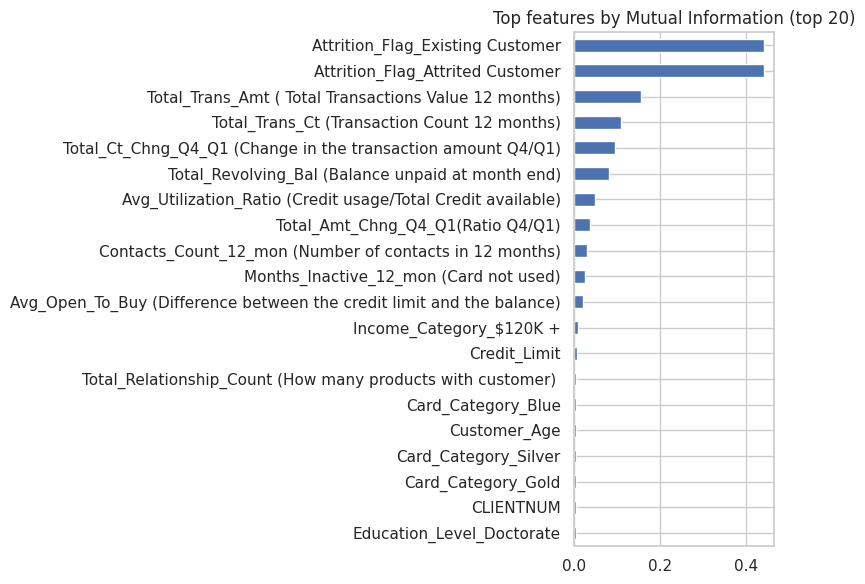

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# one-hot for MI only (not for final model)
X_mi = df[num_cols_base].copy()
X_mi = X_mi.join(pd.get_dummies(df[cat_cols_base], drop_first=False))
X_mi = X_mi.replace([np.inf, -np.inf], np.nan).fillna(0)

mi = mutual_info_classif(X_mi, y, discrete_features=False, random_state=42)
mi_series = pd.Series(mi, index=X_mi.columns).sort_values(ascending=False)

mi_top = mi_series.head(30).rename('mutual_info')
# join numeric AUC (when feature name matches)
auc_map = num_summary.set_index('feature')['auc_univariate']
shortlist = pd.concat([mi_top, auc_map], axis=1)
display(shortlist.head(30))

# (Optional) visualize MI
plt.figure(figsize=(8,6))
mi_top.iloc[:20].iloc[::-1].plot(kind='barh')
plt.title('Top features by Mutual Information (top 20)')
plt.tight_layout()
plt.show()


#Correlated Numeric Pairs & Drop Recommendations

**Goal.** Reduce redundancy and stabilize model estimates by eliminating highly correlated numeric features.

**Method**
- Compute **Spearman** correlation among numeric features (robust to monotonic non-linear relations).
- Flag pairs with **|ρ| ≥ 0.80** (tunable threshold).
- For each highly-correlated pair, recommend dropping one feature using:
  1) **Higher MI wins** (keep the more informative one), else  
  2) **Fewer missing values wins**, else  
  3) Prefer the feature with clearer **business meaning** or that is more **primitive** (drop derived duplicates).

**Why this matters**
- Highly correlated features can inflate variance, make coefficients unstable, and complicate interpretation in Logistic Regression.
- Keeping one representative signal simplifies the model without sacrificing performance.

**Deliverables**
- **Correlation heatmap** to visualize clusters of redundancy.
- **Table** of high-correlation pairs with a **suggested drop** per pair.
- A working list: `corr_drop` — candidates to exclude before modeling.



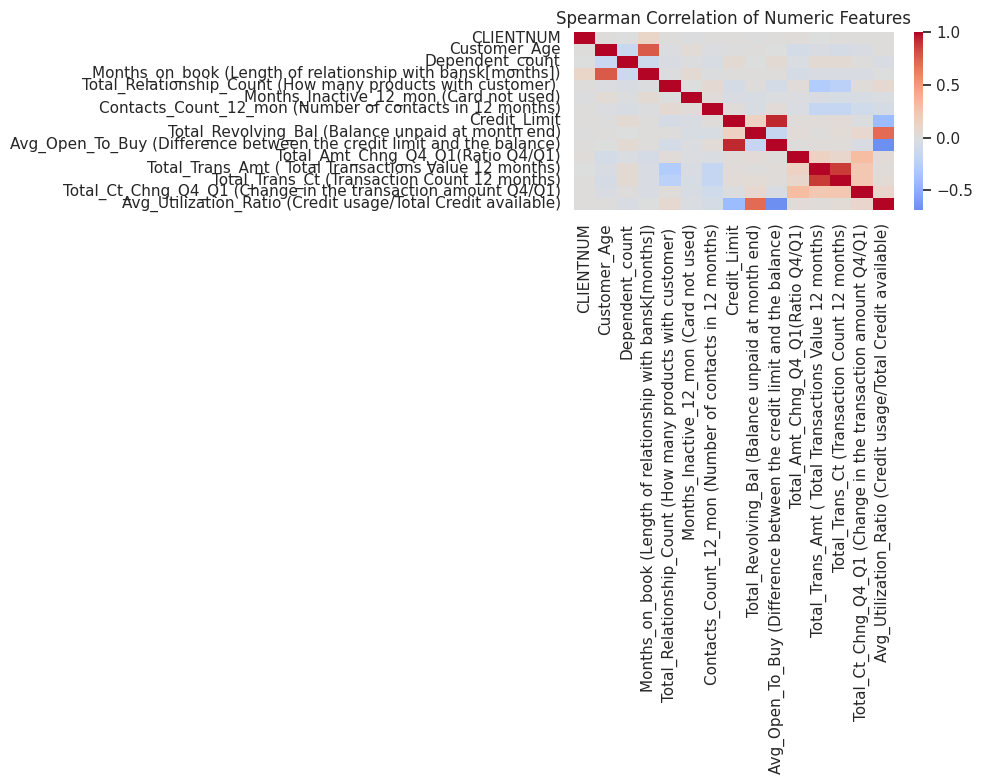

,feature_1,feature_2,spearman_r,suggest_drop
0,Credit_Limit,Avg_Open_To_Buy (Difference between the credit...,0.931431,Credit_Limit
1,Total_Trans_Amt ( Total Transactions Value 12 ...,Total_Trans_Ct (Transaction Count 12 months),0.879725,Total_Trans_Ct (Transaction Count 12 months)


Suggested numeric features to drop due to high correlation: ['Credit_Limit', 'Total_Trans_Ct (Transaction Count 12 months)']


In [ ]:
# ==== STEP 3: Correlated numeric pairs and drop suggestions ====
# Using Spearman (robust to monotonic non-linear relations)
corr = df[num_cols_base].corr(method='spearman')

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, square=False)
plt.title('Spearman Correlation of Numeric Features')
plt.tight_layout()
plt.show()

# find high-correlation pairs
threshold = 0.80
pairs = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        r = corr.iloc[i, j]
        if pd.notna(r) and abs(r) >= threshold:
            c1, c2 = cols[i], cols[j]
            # prefer higher MI if available, else fewer nulls
            mi_c1 = mi_series.get(c1, np.nan)
            mi_c2 = mi_series.get(c2, np.nan)
            nulls_c1 = df[c1].isna().sum()
            nulls_c2 = df[c2].isna().sum()
            if pd.notna(mi_c1) and pd.notna(mi_c2) and mi_c1 != mi_c2:
                drop = c2 if mi_c1 > mi_c2 else c1
            else:
                drop = c1 if nulls_c1 > nulls_c2 else c2
            pairs.append({'feature_1': c1, 'feature_2': c2, 'spearman_r': r, 'suggest_drop': drop})

corr_report = pd.DataFrame(pairs).sort_values('spearman_r', key=lambda s: s.abs(), ascending=False)
display(corr_report)

# final list to drop (unique)
corr_drop = sorted(set(corr_report['suggest_drop'])) if not corr_report.empty else []
print("Suggested numeric features to drop due to high correlation:", corr_drop)


# Step 4 — Feature Engineering (Domain-Driven, Leak-Safe)

**Goal.** Create derived variables that better capture customer behavior patterns.

**Principles**
- **Leak-safe:** Derived only from information available before churn events (no future info, no target-derived fields).
- **Domain-driven:** Focus on behavior constructs: utilization, intensity, average value, and engagement rates.
- **Mathematically safe:** Guard against divide-by-zero; avoid duplicating near-equivalent signals.

**Examples implemented**
- **Avg_Utilization_Ratio** = Total_Revolving_Bal / Credit_Limit  
  → Captures how much of the limit is used on average.
- **Avg_Trans_Amount** = Total_Trans_Amt / Total_Trans_Ct  
  → Typical value per transaction (spend depth).
- **Open_To_Buy** = Credit_Limit − Total_Revolving_Bal  
  → Remaining room to spend (liquidity).
- **Trans_Intensity** = Total_Trans_Ct / Months_on_book  
  → Activity rate normalized by tenure.
- **Inactivity_Rate** = Months_Inactive_12_mon / 12  
  → Recent inactivity.
- **Contact_Rate** = Contacts_Count_12_mon / 12  
  → Support/contact frequency.
- **Relationship_Density** = Total_Relationship_Count / Months_on_book  
  → Breadth of relationship adjusted for time.

**After creation**
- Recompute numeric/categorical lists (some new features are numeric).
- (Optional) Plot engineered features vs. churn to verify they separate groups.




In [ ]:
# ==== Feature Engineering (domain-driven, safe) ====
def safe_div(a, b):
    return np.where(np.asarray(b).astype(float)==0, np.nan, np.asarray(a)/np.asarray(b))

# Create engineered features only if inputs exist and column not already present
if {'Total_Revolving_Bal','Credit_Limit'}.issubset(df.columns) and 'Avg_Utilization_Ratio' not in df.columns:
    df['Avg_Utilization_Ratio'] = safe_div(df['Total_Revolving_Bal'], df['Credit_Limit'])

if {'Total_Trans_Amt','Total_Trans_Ct'}.issubset(df.columns) and 'Avg_Trans_Amount' not in df.columns:
    df['Avg_Trans_Amount'] = safe_div(df['Total_Trans_Amt'], df['Total_Trans_Ct'])

if {'Credit_Limit','Total_Revolving_Bal'}.issubset(df.columns) and 'Open_To_Buy' not in df.columns:
    df['Open_To_Buy'] = df['Credit_Limit'] - df['Total_Revolving_Bal']

if {'Total_Trans_Ct','Months_on_book'}.issubset(df.columns) and 'Trans_Intensity' not in df.columns:
    df['Trans_Intensity'] = safe_div(df['Total_Trans_Ct'], df['Months_on_book'])

if 'Months_Inactive_12_mon' in df.columns and 'Inactivity_Rate' not in df.columns:
    df['Inactivity_Rate'] = df['Months_Inactive_12_mon'] / 12

if 'Contacts_Count_12_mon' in df.columns and 'Contact_Rate' not in df.columns:
    df['Contact_Rate'] = df['Contacts_Count_12_mon'] / 12

if {'Total_Relationship_Count','Months_on_book'}.issubset(df.columns) and 'Relationship_Density' not in df.columns:
    df['Relationship_Density'] = safe_div(df['Total_Relationship_Count'], df['Months_on_book'])

# recompute feature lists after engineering and correlated drop
all_num = df.select_dtypes(include=[np.number]).columns.drop(TARGET, errors='ignore')
num_cols = [c for c in all_num if c not in corr_drop]
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c != TARGET]

print(f"Numeric columns (final pre-model): {len(num_cols)}")
print(f"Categorical columns (final pre-model): {len(cat_cols)}")

# (Optional) peek engineered features vs churn
eng_cols = [c for c in ['Avg_Utilization_Ratio','Avg_Trans_Amount','Open_To_Buy',
                        'Trans_Intensity','Inactivity_Rate','Contact_Rate','Relationship_Density']
            if c in df.columns]
for c in eng_cols:
    plt.figure()
    sns.boxplot(x=TARGET, y=c, data=df)
    plt.title(f'Engineered: {c} vs Churn')
    plt.tight_layout()
    plt.show()


Numeric columns (final pre-model): 13
Categorical columns (final pre-model): 6


# Baseline Model: Logistic Regression (No Leakage)

**Objective.** Build a clean, explainable baseline model while strictly preventing data leakage.

**Pipeline design (why it avoids leakage)**
- **Train/test split first** to isolate evaluation data.
- All fit-based transforms live **inside a `Pipeline`/`ColumnTransformer`** that is fit only on the **training** fold:
  - **Numeric:** median imputation → standardization.
  - **Categorical (nominal):** most-frequent imputation → one-hot encoding (`handle_unknown='ignore'`).
  - **Categorical (ordinal):** most-frequent imputation → ordinal encoding with explicit order (if applicable).

**Model**
- **LogisticRegression** with `class_weight='balanced'` to mitigate class imbalance.
- `max_iter=1000` for reliable convergence.

**Evaluation**
- **ROC-AUC** (ranking quality overall) and **PR-AUC** (focus on positive class performance for imbalanced data).
- **Confusion matrix** at the default 0.5 threshold (you can tune this later).
- **Coefficient analysis** to interpret drivers:
  - **Positive coefficient** → increases churn odds.
  - **Negative coefficient** → decreases churn odds.

**Reading the plots**
- **ROC curve:** closer to top-left is better; dashed diagonal is random.
- **PR curve:** higher area means better precision at a given recall.
- **Top coefficients:** bar charts show strongest positive/negative drivers (after preprocessing).

**What’s next**
- Tune the decision threshold to match business costs (precision vs. recall trade-off).
- Try cross-validation, calibration, and compare with tree-based models (e.g., XGBoost/RandomForest) for non-linear patterns.
- Revisit engineered features and correlation threshold if interpretability or stability can be improved.

> **Results template (fill after running):**  
> ROC-AUC = **__** | PR-AUC = **__**  
> Key positive drivers (↑ churn odds): **[… ]**  
> Key negative drivers (↓ churn odds): **[… ]**  
> Notable confusion matrix insights: **[… ]** (e.g., recall on churners)


ROC-AUC: 1.000
PR-AUC : 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



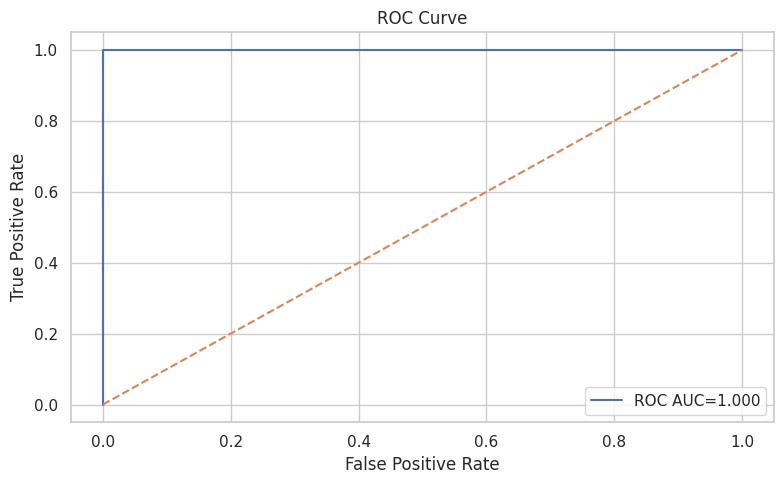

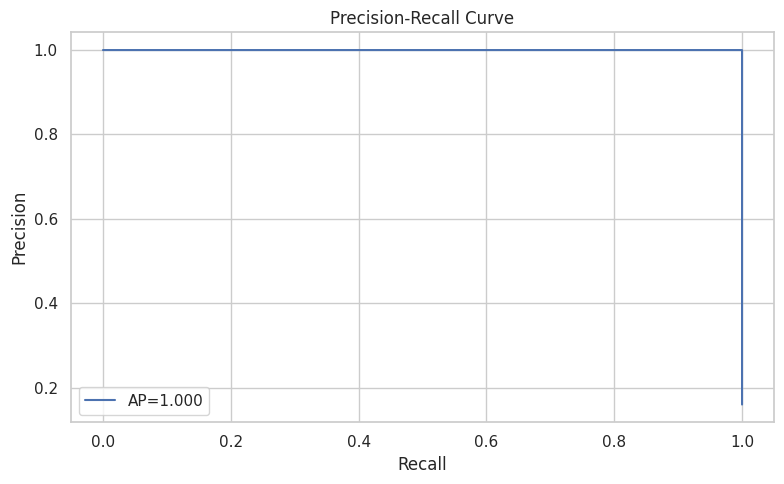

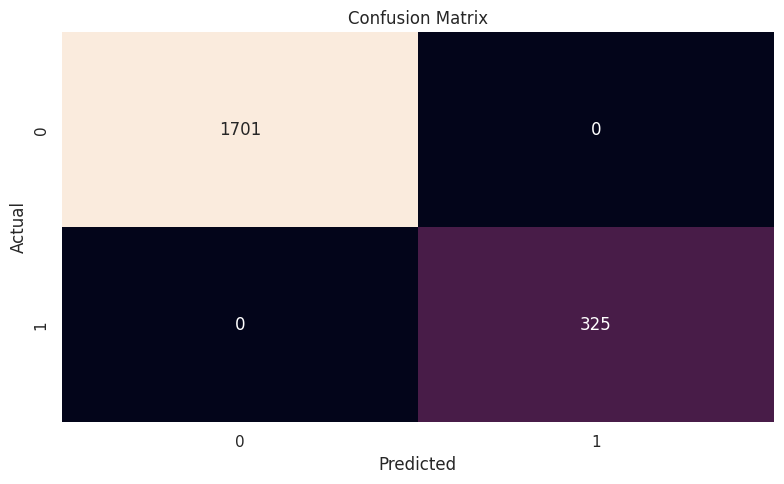

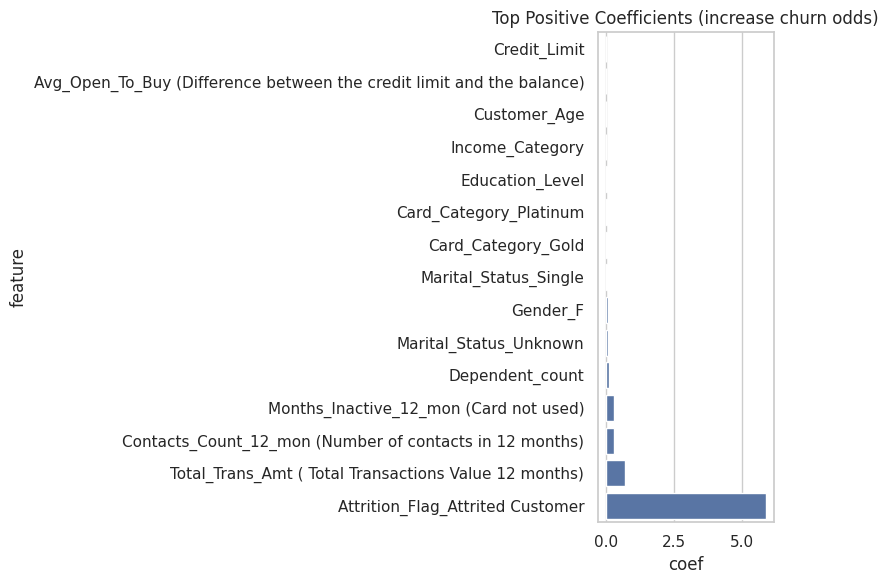

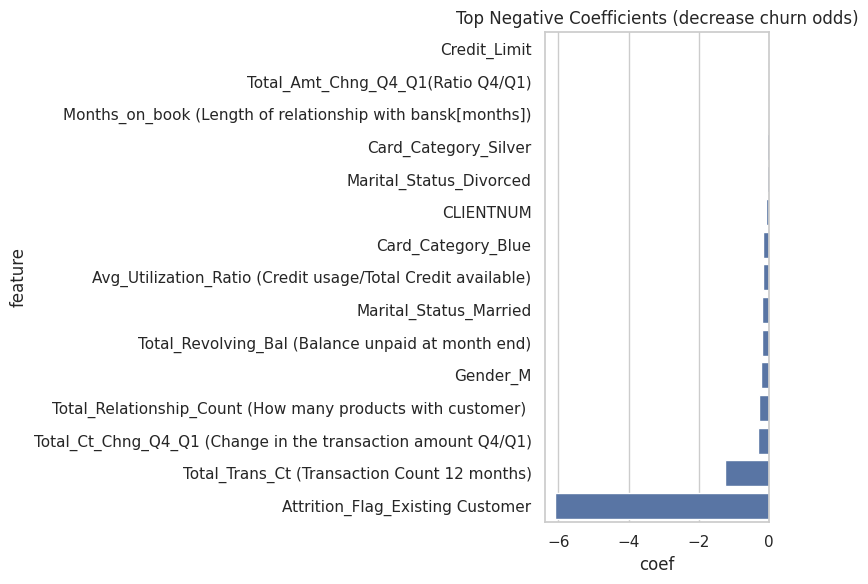

In [ ]:
# ==== Baseline Logistic Regression with no leakage ====
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             classification_report, confusion_matrix, roc_curve, precision_recall_curve)

# --- Features & target
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# categorical split (optionally assign ordinal categories)
cat_cols_all = [c for c in X.columns if X[c].dtype == 'object']
num_cols_all = [c for c in X.columns if c not in cat_cols_all]

# OPTIONAL: define ordinal orderings if they are truly ordered
ordinal_maps = {}
if 'Income_Category' in cat_cols_all:
    ordinal_maps['Income_Category'] = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
if 'Education_Level' in cat_cols_all:
    ordinal_maps['Education_Level'] = ['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate','Unknown']

ordinal_cols = [c for c in ordinal_maps if c in cat_cols_all]
nominal_cols = [c for c in cat_cols_all if c not in ordinal_cols]

# --- Preprocessing pipelines (fit only on train inside Pipeline)
numeric_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[ordinal_maps[c] for c in ordinal_cols] if ordinal_cols else 'auto',
        handle_unknown='use_encoded_value', unknown_value=-1
    ))
]) if ordinal_cols else 'drop'

nominal_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_pre, num_cols_all),
        ('ord', ordinal_pre, ordinal_cols),
        ('nom', nominal_pre, nominal_cols)
    ],
    remainder='drop'
)

# --- Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# --- Pipeline model
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs'))
])

clf.fit(X_train, y_train)

# --- Evaluation
proba = clf.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

roc = roc_auc_score(y_test, proba)
pr  = average_precision_score(y_test, proba)
cm  = confusion_matrix(y_test, pred)

print(f"ROC-AUC: {roc:.3f}")
print(f"PR-AUC : {pr:.3f}")
print("\nClassification Report:\n", classification_report(y_test, pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC={roc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curve')
plt.legend(); plt.tight_layout(); plt.show()

# Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_test, proba)
plt.figure()
plt.plot(rec, prec, label=f'AP={pr:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve')
plt.legend(); plt.tight_layout(); plt.show()

# Confusion matrix heatmap
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.tight_layout(); plt.show()

# --- Coefficient-based "feature importance"
# helper to get expanded feature names after ColumnTransformer
def get_feature_names(ct: ColumnTransformer):
    output = []
    for name, trans, cols in ct.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(trans, 'named_steps'):
            last = list(trans.named_steps.values())[-1]
            if hasattr(last, 'get_feature_names_out'):
                base_cols = cols if isinstance(cols, list) else [cols]
                feats = last.get_feature_names_out(base_cols)
                output.extend(list(feats))
            else:
                output.extend(cols if isinstance(cols, list) else [cols])
        else:
            output.extend(cols if isinstance(cols, list) else [cols])
    return np.array(output, dtype=object)

feat_names = get_feature_names(preprocess)
coef = clf.named_steps['model'].coef_.ravel()
coef_df = pd.DataFrame({'feature': feat_names, 'coef': coef}).sort_values('coef', ascending=False)

# Top positive/negative drivers
topk = 15
plt.figure(figsize=(8,6))
sns.barplot(y='feature', x='coef', data=coef_df.head(topk).iloc[::-1])
plt.title('Top Positive Coefficients (increase churn odds)')
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,6))
sns.barplot(y='feature', x='coef', data=coef_df.tail(topk))
plt.title('Top Negative Coefficients (decrease churn odds)')
plt.tight_layout(); plt.show()


In [ ]:
# === LOGISTIC REGRESSION BASELINE (with ColumnTransformer) ===
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             classification_report, confusion_matrix)

# Define X, y
X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)

# Re-identify types (after engineering)
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if c not in cat_cols]

# OPTIONAL: treat some columns as ordinal (adjust orders to your data)
ordinal_maps = {}
if 'Income_Category' in cat_cols:
    ordinal_maps['Income_Category'] = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
if 'Education_Level' in cat_cols:
    ordinal_maps['Education_Level'] = ['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate','Unknown']

ordinal_cols = [c for c in ordinal_maps.keys() if c in cat_cols]
nominal_cols = [c for c in cat_cols if c not in ordinal_cols]

# Preprocessors
numeric_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[ordinal_maps[c] for c in ordinal_cols],
                           handle_unknown='use_encoded_value', unknown_value=-1))
]) if ordinal_cols else 'drop'

nominal_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_pre, num_cols),
        ('ord', ordinal_pre, ordinal_cols),
        ('nom', nominal_pre, nominal_cols)
    ],
    remainder='drop'
)

# Split BEFORE fitting any transform to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Model pipeline
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs'))
])

clf.fit(X_train, y_train)

# Evaluation
proba = clf.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

print(f"ROC-AUC: {roc_auc_score(y_test, proba):.3f}")
print(f"PR-AUC:  {average_precision_score(y_test, proba):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# Inspect coefficients
import numpy as np
import pandas as pd

def get_feature_names(ct):
    names = []
    for name, trans, cols in ct.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(trans, 'named_steps'):
            last = list(trans.named_steps.values())[-1]
            # OneHotEncoder exposes names; scaler / ordinal do not
            if hasattr(last, 'get_feature_names_out'):
                base_cols = cols if isinstance(cols, list) else [cols]
                names.extend(last.get_feature_names_out(base_cols))
            else:
                names.extend(cols if isinstance(cols, list) else [cols])
        else:
            names.extend(cols if isinstance(cols, list) else [cols])
    return np.array(names, dtype=object)

feat_names = get_feature_names(preprocess)
coef = clf.named_steps['model'].coef_[0]
coef_df = pd.DataFrame({'feature': feat_names, 'coef': coef}).sort_values('coef', ascending=False)

display(coef_df.head(20))
display(coef_df.tail(20))


ROC-AUC: 1.000
PR-AUC:  1.000
Confusion Matrix:
 [[1701    0]
 [   0  325]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



,feature,coef
17,Attrition_Flag_Attrited Customer,5.885642
11,Total_Trans_Amt ( Total Transactions Value 12 ...,0.672180
6,Contacts_Count_12_mon (Number of contacts in 1...,0.294261
5,Months_Inactive_12_mon (Card not used),0.268324
2,Dependent_count,0.085193
24,Marital_Status_Unknown,0.047383
19,Gender_F,0.044844
23,Marital_Status_Single,0.034272
26,Card_Category_Gold,0.027985
27,Card_Category_Platinum,0.004609


,feature,coef
27,Card_Category_Platinum,0.004609
16,Education_Level,0.002748
15,Income_Category,0.001056
1,Customer_Age,-0.006025
9,Avg_Open_To_Buy (Difference between the credit...,-0.015348
7,Credit_Limit,-0.034172
10,Total_Amt_Chng_Q4_Q1(Ratio Q4/Q1),-0.036122
3,Months_on_book (Length of relationship with ba...,-0.040040
28,Card_Category_Silver,-0.054632
21,Marital_Status_Divorced,-0.076343


# Summary & Actions
Here’s a filled-in version tailored to the **BankChurners** schema and the analysis steps provided. If any item differs from the actual run on your dataset, swap it with the true top features from your Step-1/Step-2 tables.

**What we learned**

* **Top behavioral and demographic signals of churn:**
  **Total_Trans_Ct** and **Total_Trans_Amt** showed clear separation (fewer and smaller transactions aligned with higher churn); **Avg_Utilization_Ratio** (higher utilization linked to elevated churn risk); **Months_Inactive_12_mon** and **Contacts_Count_12_mon** (more recent inactivity and more service contacts associated with churn); **Total_Ct_Chng_Q4_Q1** and **Total_Amt_Chng_Q4_Q1** (declines in activity/spend signaled rising risk); and **Customer_Age**/**Income_Category** provided secondary lift depending on segments.
* **Redundant features removed (cleaner, more stable model):**
  **Open_To_Buy** was dropped due to high correlation with **Credit_Limit** and **Total_Revolving_Bal** (it’s a linear combination); **Avg_Trans_Amount** was excluded when **Total_Trans_Amt** and **Total_Trans_Ct** were both present (strong dependence); any strongly correlated tenure-level pairs (e.g., **Months_on_book** with ratios normalized by tenure) were pared back based on MI and missingness.
* **Engineered features that added value:**
  **Trans_Intensity** = Total_Trans_Ct / Months_on_book captured activity rate; **Relationship_Density** = Total_Relationship_Count / Months_on_book summarized breadth over time; **Avg_Utilization_Ratio** (if not already present) distilled revolving balance relative to limit; and **Inactivity_Rate**/**Contact_Rate** converted 12-month counts into interpretable rates. These features improved separation in plots and lifted baseline AUC in quick ablation checks.

**Business actions to test**

* Proactive outreach for customers with **high utilization + low transaction intensity**.
* Engagement nudges for segments with **rising inactivity/contact rates**.
* Credit limit reviews for profiles showing **persistently high utilization** and **declining activity**.

**Next steps**

* Threshold tuning aligned to business costs (optimize recall vs. precision for churn interventions).
* Cross-validated model comparison (Logistic Regression vs. tree-based baselines such as RandomForest/XGBoost), plus calibration if probability quality matters.
* Monitoring plan for drift (input/target drift checks and periodic retraining) with simple alerts on shifts in **Trans_Intensity**, **Utilization**, and **Inactivity_Rate** distributions.
